## Initialize a Custom Dark-Punk Theme Matplotlib

In [103]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# ----------------------------
# Dark theme palette
# ----------------------------
DARK_FIG = "k"            # figure background
DARK_AX  = "#0f1626"      # axes background
FG       = "#e6e6e6"      # foreground text/ticks
GRID_C   = "#2a3448"      # grid lines
LEG_BG   = "#0b1220"      # legend background
LEG_EDGE = "#3a465f"      # legend edge

# ----------------------------
# Bold, journal-style defaults + dark theme
# ----------------------------
mpl.rcParams.update({
    # Fonts & math
    "font.family": "sans-serif",
    "mathtext.fontset": "cm",
    "font.size": 15,
    "axes.titlesize": 18,
    "axes.labelsize": 18,

    # Axes & spines
    "axes.linewidth": 2.6,
    "axes.labelpad": 8,
    "axes.facecolor": DARK_AX,
    "axes.edgecolor": FG,
    "axes.labelcolor": FG,

    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 9,
    "ytick.major.size": 9,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.major.width": 2.2,
    "ytick.major.width": 2.2,
    "xtick.minor.width": 1.8,
    "ytick.minor.width": 1.8,
    "xtick.major.pad": 6,
    "ytick.major.pad": 6,
    "xtick.color": FG,
    "ytick.color": FG,

    # Grid
    "axes.grid": False,
    "grid.color": GRID_C,

    # Text
    "text.color": FG,

    # Lines
    "lines.linewidth": 2.4,
    "lines.markersize": 6,

    # Legend (auto-dark)
    "legend.frameon": True,
    "legend.facecolor": LEG_BG,
    "legend.edgecolor": LEG_EDGE,
    "legend.framealpha": 0.95,
    "legend.fontsize": 15,
    "legend.borderaxespad": 1,

    # Figure / saving
    "figure.facecolor": DARK_FIG,
    "savefig.facecolor": DARK_FIG,
    "savefig.edgecolor": DARK_FIG,
    "figure.dpi": 150,
    "savefig.dpi": 350,
    "savefig.bbox": "tight",
})

# ----------------------------
# Other imports
# ----------------------------
import batman
import numpy as np

## Simulate a repeating exoplanet transit with `batman`

In [60]:
# let's start with defining transit parameters defult from baTman
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.8                     #orbital period
params.rp = 0.9                      #planet radius (in units of stellar radii)
params.a = 9.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

In [326]:
# helper functions

def find_largest_gap(time_array, return_indices=False):
    """For a given time array, find the largest gap between consecutive observations.

    Parameters
    ----------
    time_array : array-like
        An array of time observations

    Returns
    -------
    gap_start : float
        The time at the start of the largest gap
    gap_end : float
        The time at the end of the largest gap
    ��� or ���
    idx_start : int
        The index of the time at the start of the largest gap
    idx_end : int
        The index of the time at the end of the largest gap
    """

    check_sort = np.all(sorted(time_array)==time_array)

    if not check_sort:
        print ("Time array not sorted. Sorting now...")
        time_array = time_array[np.argsort(time_array)]


    delta_time = np.diff(time_array)

    if return_indices:
        return np.argmax(delta_time), np.argmax(delta_time)+1
    else:
        return time_array[np.argmax(delta_time)], time_array[np.argmax(delta_time)+1]


Text(0, 0.5, 'Norm. Flux')

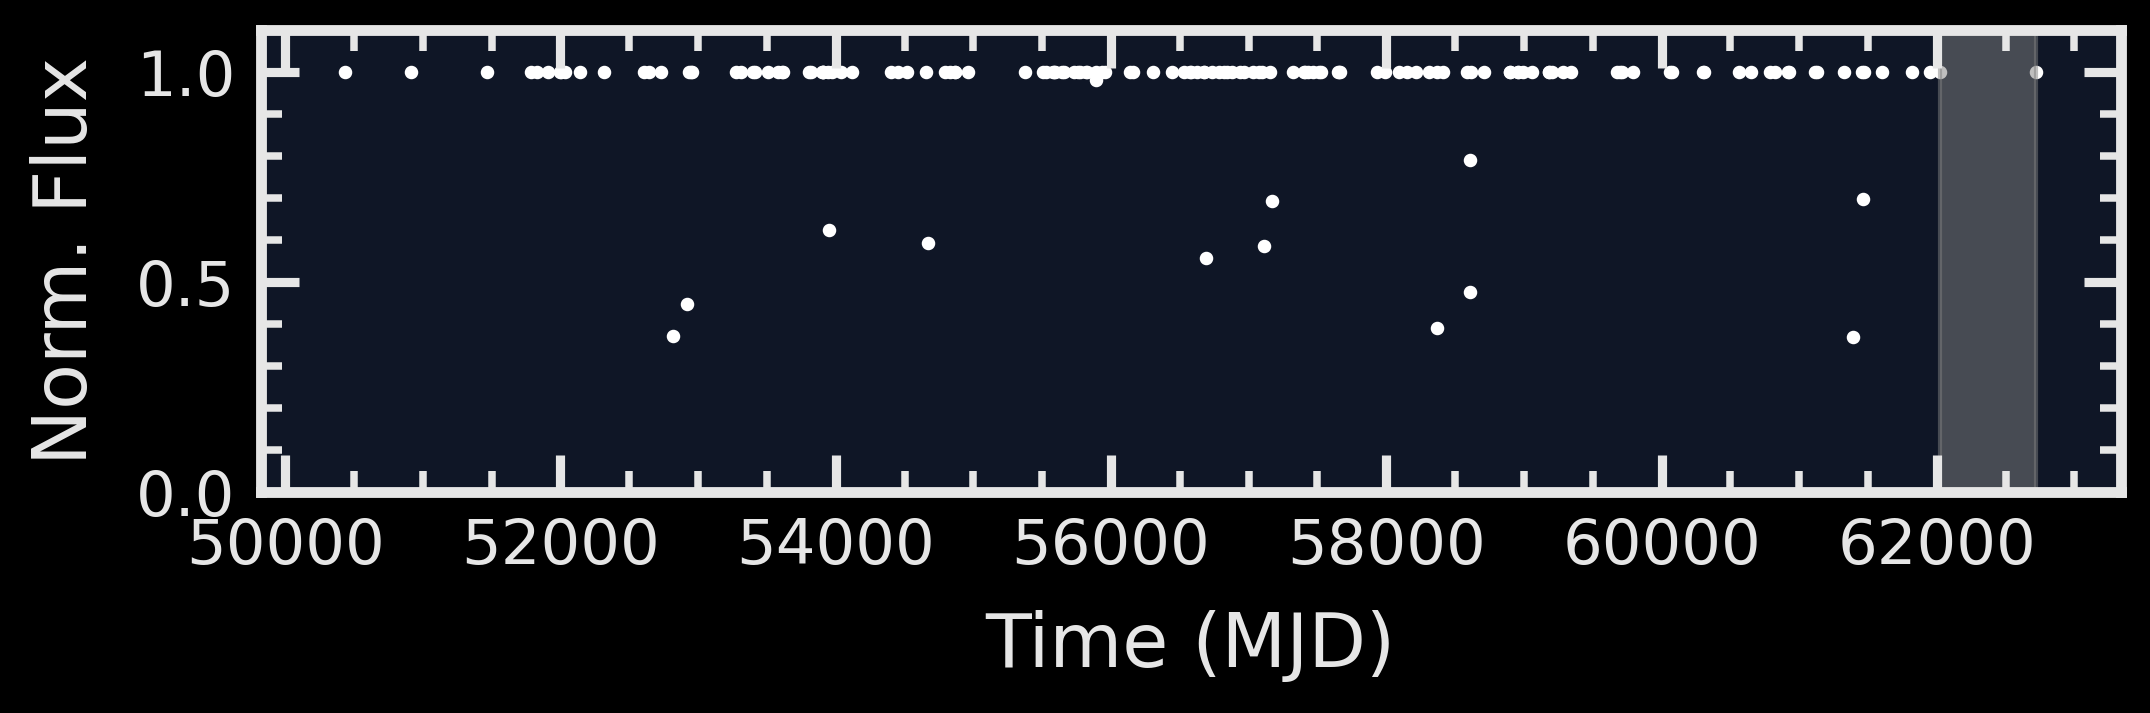

In [327]:
# let's assume we're dealing with MJD format time
mjd_min = 52000
mjd_max = 61000

Nobs = 150
seed_gen = np.random.default_rng(np.random.randint(1e3))
tobs = np.linspace(mjd_min, mjd_max, Nobs)
tobs += seed_gen.integers(0, 1e1, size=Nobs)
tobs += seed_gen.normal(1e1, 1e3, size=Nobs)
tobs = tobs[np.argsort(tobs)]

m = batman.TransitModel(params, tobs) 
flux = m.light_curve(params)

t_large_gap = find_largest_gap(tobs)

plt.figure(figsize=(8,2))
plt.scatter(tobs, flux, color='w', s=5)
plt.axvspan(t_large_gap[0], t_large_gap[1], color='gray', alpha=0.5)

plt.ylim(0, 1.1)
plt.xlabel("Time (MJD)")
plt.ylabel("Norm. Flux")